In [ ]:
!pip install python-twitter 

     |████████████████████████████████| 67 kB 2.7 MB/s 


In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 5.6 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=43539ee43fe773d1bd151a3f408f38e45878060be44969fbd0e041aff6cf5788
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
!pip install requests


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=53c09caf4a39ab6fbc320e105b227cd3f7b5af7dccdbe1e700cdbb48581ae041
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string 
import tweepy

from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import tweepy
MAX_TWEETS = 5000000000000000000000

from twitter import *




'''result = t.geo.search(query="INDIA", granularity="country")
place_id = result['result']['places'][0]['id']

result = t.search.tweets(q="place:%s" % place_id)
for tweet in result['statuses']:
    print tweet['text'] + " | " + tweet['place']['name'] if tweet['place'] else "Undefined place"'''


'result = t.geo.search(query="INDIA", granularity="country")\nplace_id = result[\'result\'][\'places\'][0][\'id\']\n\nresult = t.search.tweets(q="place:%s" % place_id)\nfor tweet in result[\'statuses\']:\n    print tweet[\'text\'] + " | " + tweet[\'place\'][\'name\'] if tweet[\'place\'] else "Undefined place"'

In [ ]:
consumerKey = "yV194Caqih6pzQfeM8PIAazbx"
consumerSecret = "KCLqvwAflyjqXPxNUMxG1ltGkRnk2wAcCOljwLeZFgB2w323UG"
accessToken = "1307768033264513027-LxEjKKcqSKvJrHQyBrsYKMs0ikYdO5"
accessTokenSecret = "btuSGyeiVNQ1UaERUnisv7bysOAGh8Cnsvk1yybTcw5Js"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.DataFrame(columns=['text', 'source', 'url'])
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search, q='#bmw', rpp=100).items(10):
    msg = [tweet.text, tweet.source, tweet.source_url] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

#keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("please enter how many tweets to analyze: "))

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

tweets = tweepy.Cursor(api.search, q="#covaxin", lang="en", since="2021-11-03").items(noOfTweet)

for tweet in tweets:
  #if tweet.created_at < endDate and tweet.created_at > startDate: 
      #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
      
    if neg > pos:
      negative_list.append(tweet.text)
      negative += 1

    elif pos > neg:
      positive_list.append(tweet.text)
      positive += 1
      
    elif pos == neg:
      neutral_list.append(tweet.text)
      neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

please enter how many tweets to analyze: 3200


In [ ]:
 #Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  3200
positive number:  2630
negative number:  325
neutral number:  245


In [ ]:
tweet_list

,0
0,RT @SatlokChannel: The #COVAXIN vaccine has be...
1,"#Covaxin approved by @WHO , the side effect w..."
2,RT @B1llyTh2K3d: The next big drop of news wil...
3,#COVAXIN And all this time #OCUGEN working to ...
4,RT @WHO: 🆕 WHO has granted emergency use listi...
...,...
3195,RT @EIT_Odisha: Marking a major development in...
3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...
3197,RT @sureshpprabhu: Congratulations to @BharatB...
3198,RT @ani_digital: Travellers vaccinated with Co...


In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(tweet_list)

                                                      0
0     RT @SatlokChannel: The #COVAXIN vaccine has be...
1     #Covaxin  approved by @WHO , the side effect w...
2     RT @B1llyTh2K3d: The next big drop of news wil...
3     #COVAXIN And all this time #OCUGEN working to ...
4     RT @WHO: 🆕 WHO has granted emergency use listi...
5     RT @MeghBulletin: Finland approves Bharat Biot...
6     RT @Dr_subhro: My thoughts on #covaxin approva...
7     It's a proud moment for our country. We've got...
8     RT @MeghBulletin: Finland approves Bharat Biot...
9     RT @MeghBulletin: Finland approves Bharat Biot...
10    RT @MeghBulletin: Finland approves Bharat Biot...
11    RT @WHO: 🆕 WHO has granted emergency use listi...
12    RT @B1llyTh2K3d: @FullTimeDreamir @CoachMontes...
13    RT @B1llyTh2K3d: @FullTimeDreamir @CoachMontes...
14    RT @mikalche: $OCGN I suspect we will have an ...
15    RT @BjpBiplab: The world recognises Hon'ble PM...
16    @FullTimeDreamir @CoachMontes24 Should've 

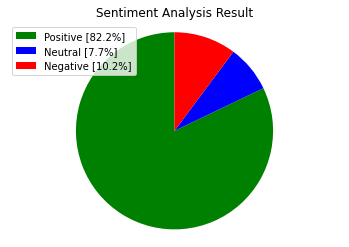

In [ ]:
#piechart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result" )
plt.axis('equal')
plt.show()

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,RT @SatlokChannel: The #COVAXIN vaccine has be...
1,"#Covaxin approved by @WHO , the side effect w...","#Covaxin approved by @WHO , the side effect w..."
2,RT @B1llyTh2K3d: The next big drop of news wil...,RT @B1llyTh2K3d: The next big drop of news wil...
3,#COVAXIN And all this time #OCUGEN working to ...,#COVAXIN And all this time #OCUGEN working to ...
4,RT @WHO: 🆕 WHO has granted emergency use listi...,RT @WHO: 🆕 WHO has granted emergency use listi...
...,...,...
3195,RT @EIT_Odisha: Marking a major development in...,RT @EIT_Odisha: Marking a major development in...
3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...,RT @Naveen_Odisha: Congratulate @BharatBiotech...
3197,RT @sureshpprabhu: Congratulations to @BharatB...,RT @sureshpprabhu: Congratulations to @BharatB...
3198,RT @ani_digital: Travellers vaccinated with Co...,RT @ani_digital: Travellers vaccinated with Co...


In [ ]:
tweet_list

,0,text
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,RT @SatlokChannel: The #COVAXIN vaccine has be...
1,"#Covaxin approved by @WHO , the side effect w...","#Covaxin approved by @WHO , the side effect w..."
2,RT @B1llyTh2K3d: The next big drop of news wil...,RT @B1llyTh2K3d: The next big drop of news wil...
3,#COVAXIN And all this time #OCUGEN working to ...,#COVAXIN And all this time #OCUGEN working to ...
4,RT @WHO: 🆕 WHO has granted emergency use listi...,RT @WHO: 🆕 WHO has granted emergency use listi...
...,...,...
3195,RT @EIT_Odisha: Marking a major development in...,RT @EIT_Odisha: Marking a major development in...
3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...,RT @Naveen_Odisha: Congratulate @BharatBiotech...
3197,RT @sureshpprabhu: Congratulations to @BharatB...,RT @sureshpprabhu: Congratulations to @BharatB...
3198,RT @ani_digital: Travellers vaccinated with Co...,RT @ani_digital: Travellers vaccinated with Co...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)


,0,text
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...
1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...
2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...
3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...
4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...
5,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin
6,RT @Dr_subhro: My thoughts on #covaxin approva...,my thoughts on covaxin approval by who in t...
7,It's a proud moment for our country. We've got...,it s a proud moment for our country we ve got...
8,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin
9,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list.head(10)



,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...,0.000000,0.000000,positive,0.102,0.667,0.231,0.5106
1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...,0.100000,0.400000,positive,0.000,0.751,0.249,0.6486
2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...,0.000000,0.050000,positive,0.084,0.757,0.159,0.4404
3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...,0.100000,0.300000,positive,0.117,0.717,0.166,0.0258
5,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin,0.000000,0.000000,positive,0.000,0.597,0.403,0.4019
6,RT @Dr_subhro: My thoughts on #covaxin approva...,my thoughts on covaxin approval by who in t...,0.000000,0.000000,positive,0.000,0.795,0.205,0.4767
7,It's a proud moment for our country. We've got...,it s a proud moment for our country we ve got...,0.400000,0.750000,positive,0.000,0.744,0.256,0.7351
8,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin,0.000000,0.000000,positive,0.000,0.597,0.403,0.4019
9,RT @MeghBulletin: Finland approves Bharat Biot...,finland approves bharat biotech s covaxin,0.000000,0.000000,positive,0.000,0.597,0.403,0.4019


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,2635,82.34
negative,332,10.38
neutral,233,7.28


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cloud.png to cloud.png


In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


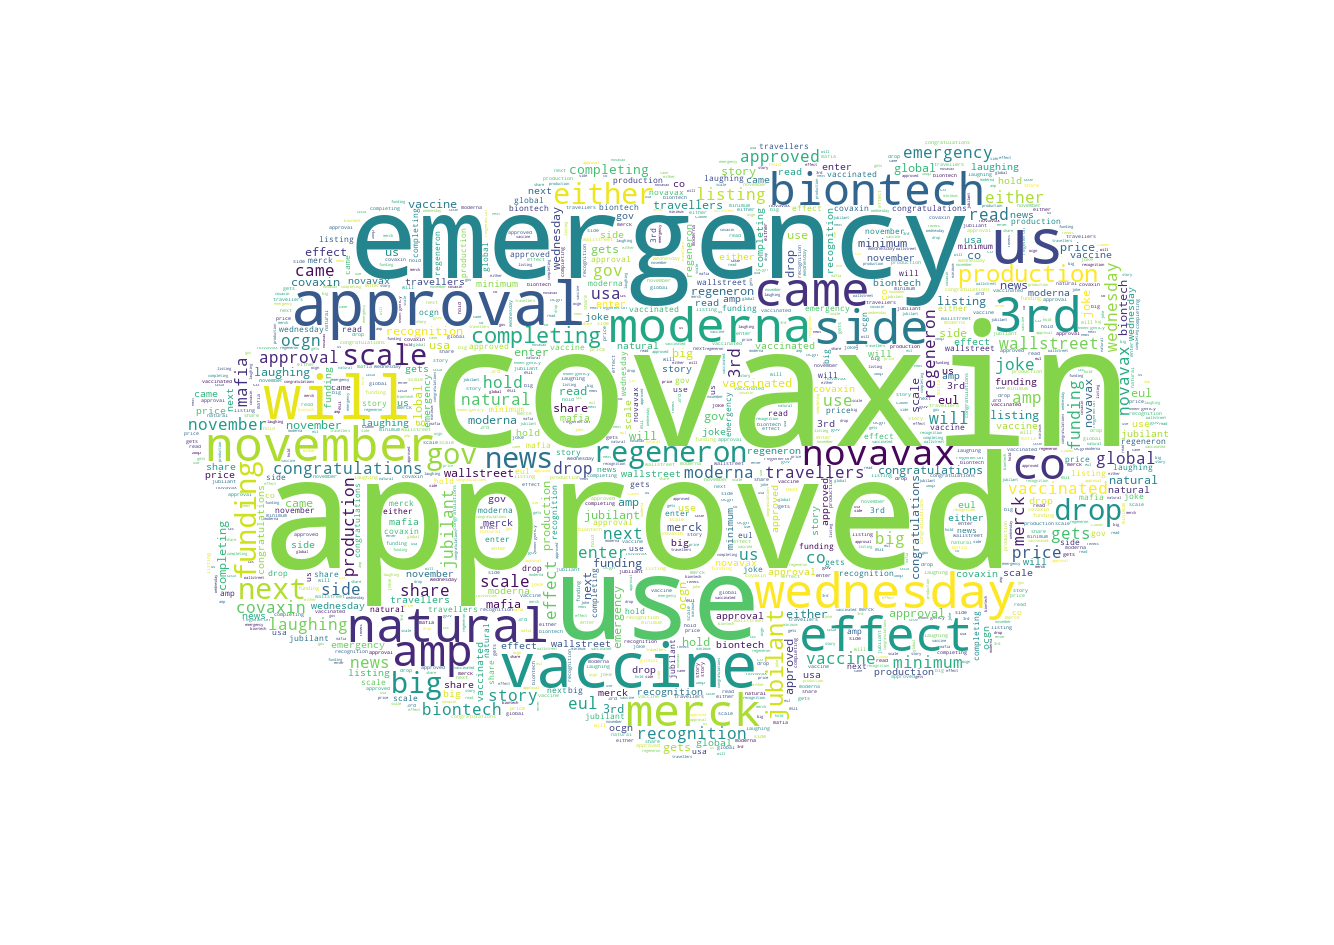

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


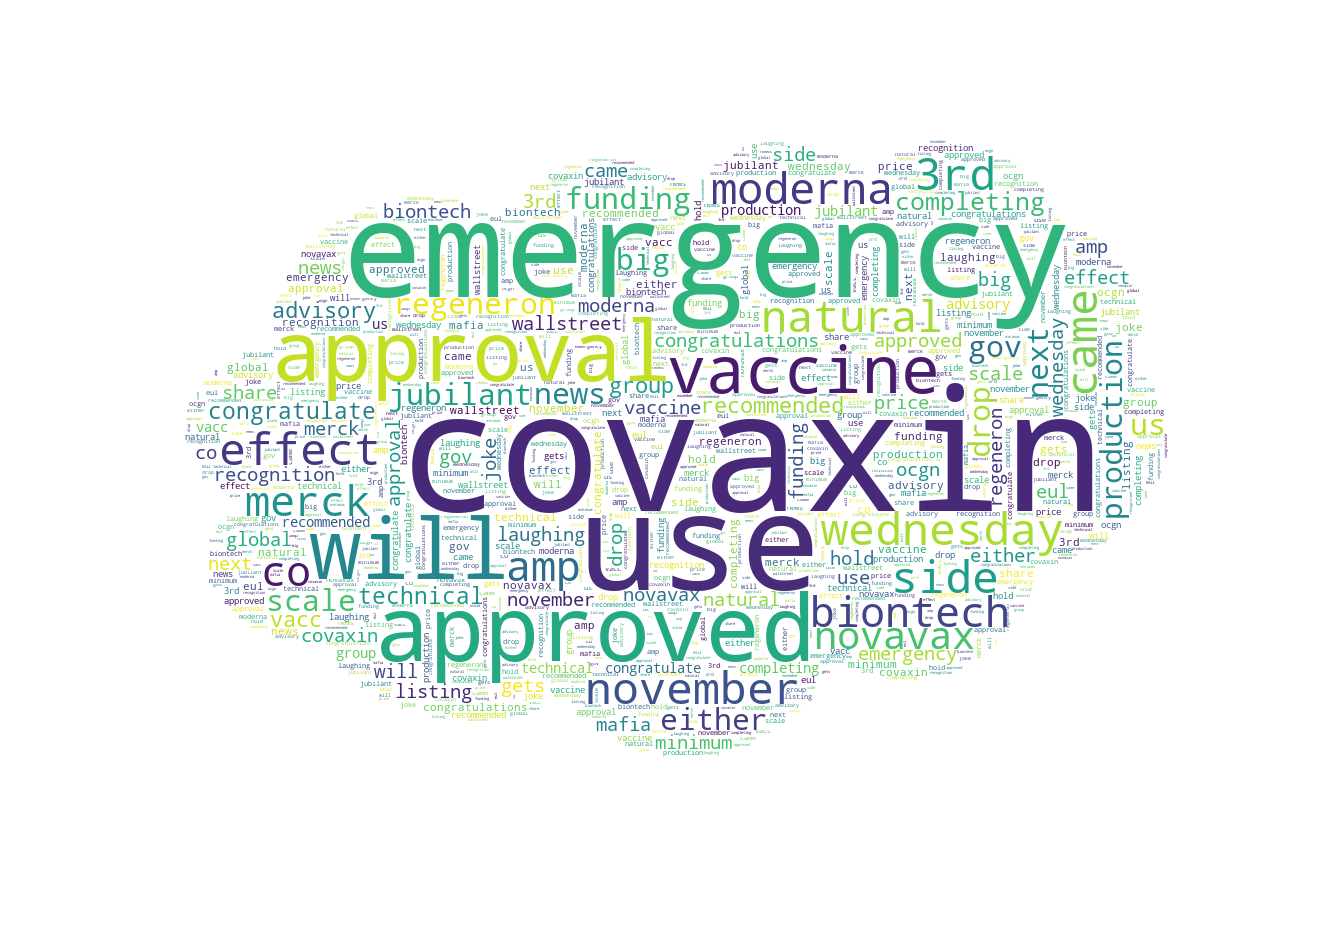

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


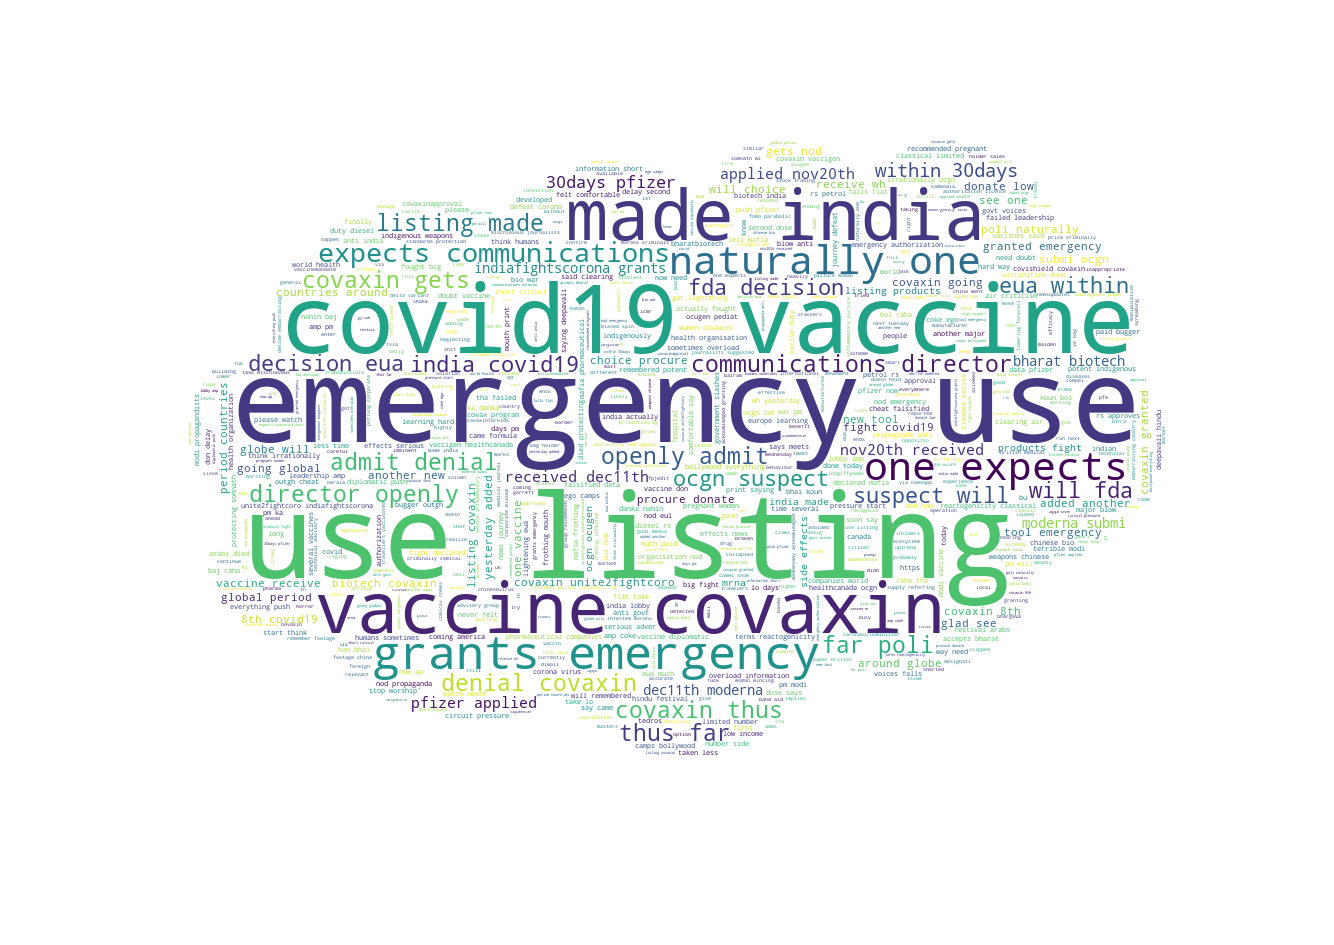

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


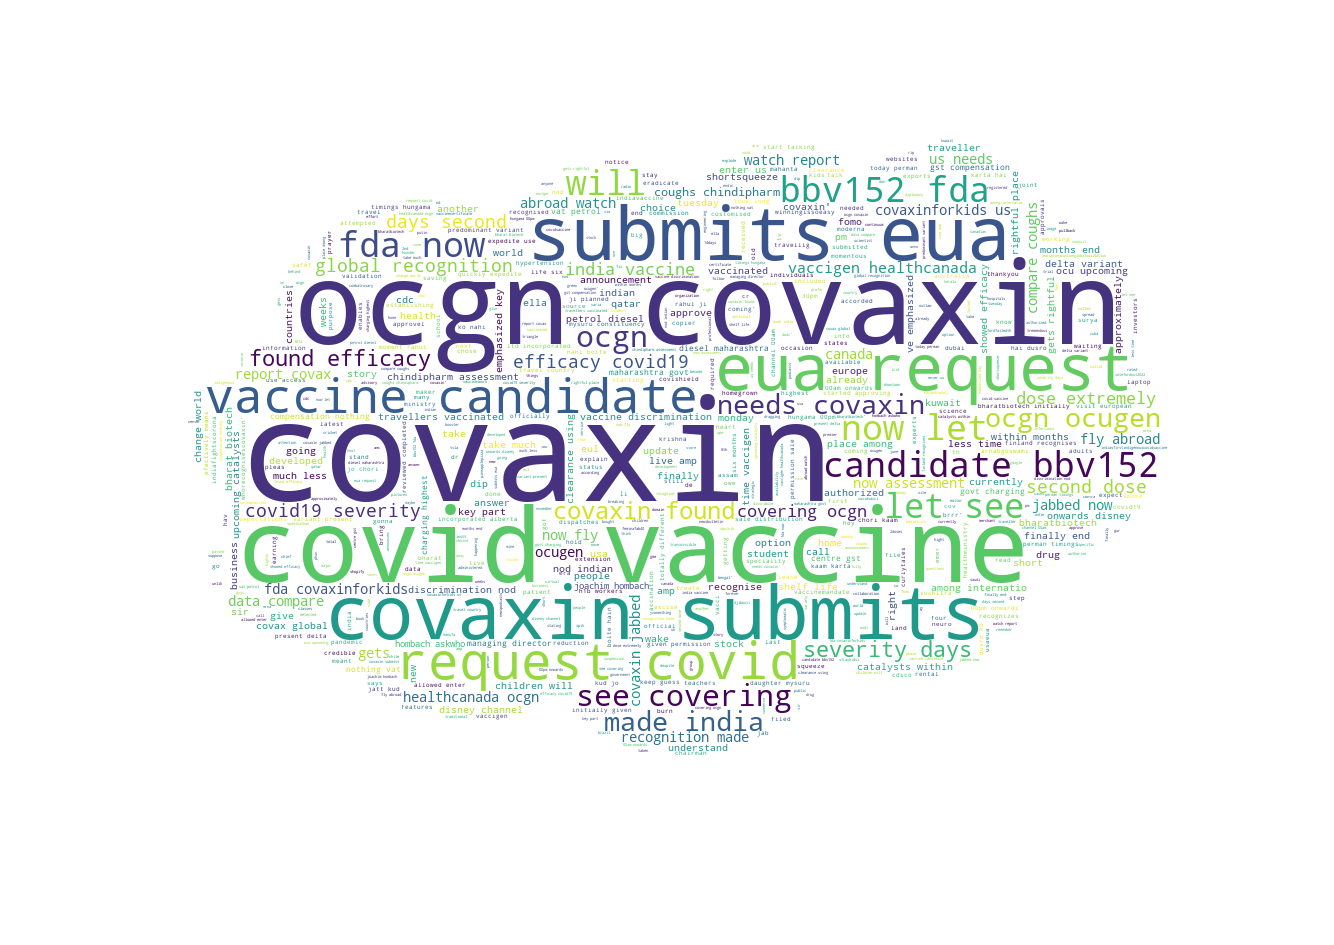

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,116.11
neutral,93.40
positive,91.96


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.68
neutral,14.66
positive,14.36


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...,0.000000,0.000000,positive,0.102,0.667,0.231,0.5106,121,20,the covaxin vaccine has been approved by who...,"[, the, covaxin, vaccine, has, been, approved,...","[, covaxin, vaccine, approved, emergency, use,...","[, covaxin, vaccin, approv, emerg, use, wednes..."
1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...,0.100000,0.400000,positive,0.000,0.751,0.249,0.6486,127,20,covaxin approved by the side effect was ...,"[, covaxin, approved, by, the, side, effect, w...","[, covaxin, approved, side, effect, natural, m...","[, covaxin, approv, side, effect, natur, moder..."
2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...,0.000000,0.050000,positive,0.084,0.757,0.159,0.4404,123,22,the next big drop of news will either be ...,"[, the, next, big, drop, of, news, will, eithe...","[, next, big, drop, news, either, gov, funding...","[, next, big, drop, news, either, gov, fund, s..."
3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,118,21,covaxin and all this time ocugen working to ...,"[, covaxin, and, all, this, time, ocugen, work...","[, covaxin, time, ocugen, working, bring, life...","[, covaxin, time, ocugen, work, bring, life, s..."
4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...,0.100000,0.300000,positive,0.117,0.717,0.166,0.0258,132,20,who has granted emergency use listing eul ...,"[, who, has, granted, emergency, use, listing,...","[, granted, emergency, use, listing, eul, cova...","[, grant, emerg, use, list, eul, covaxin, deve..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

3200 Number of reviews has 1517 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aatmanirbharbhara,aatmanirbharbharat,aayog,abil,abl,abracadabra,abroad,absolut,abt,abvp,accept,access,accord,account,accur,achiev,acknowledg,acknowledgemen,activ,actual,ad,adarniya,add,address,administ,admit,ador,adult,advantag,adver,advisori,af,affirm,ag,age,agenda,ago,agre,ahead,...,wh,whatev,whatsapp,wherev,who,whole,whorecognisescovaxin,wi,wider,win,winc,winningissoeasi,wiretheliar,wish,within,without,woke,woman,women,wonder,word,work,worker,world,worldwi,worldwid,worri,worship,would,wow,wrt,wsb,ya,ye,yeah,year,yesterday,yet,york,yr
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
covaxin,2932
approv,2586
use,1222
emerg,1215
vaccin,1152
bharat,1082
biotech,1009
finland,812
came,619
wednesday,613


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('emergency use', 1197),
 ('bharat biotech', 1009),
 ('biotech covaxin', 874),
 ('finland approves', 809),
 ('approves bharat', 803),
 ('covaxin vaccine', 661),
 ('approved emergency', 646),
 ('vaccine approved', 608),
 ('use wednesday', 607),
 ('wednesday 3rd', 607),
 ('3rd november', 607),
 ('november 2021', 607),
 ('2021 approval', 607),
 ('approval came', 607),
 ('use listing', 396),
 ('covaxin gets', 141),
 ('granted emergency', 139),
 ('vaccine covaxin', 132),
 ('listing eul', 124),
 ('covaxin developed', 113)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('bharat biotech covaxin', 874),
 ('approves bharat biotech', 803),
 ('finland approves bharat', 802),
 ('approved emergency use', 646),
 ('covaxin vaccine approved', 607),
 ('vaccine approved emergency', 607),
 ('emergency use wednesday', 607),
 ('use wednesday 3rd', 607),
 ('wednesday 3rd november', 607),
 ('3rd november 2021', 607),
 ('november 2021 approval', 607),
 ('2021 approval came', 607),
 ('emergency use listing', 396),
 ('granted emergency use', 132),
 ('use listing eul', 124),
 ('developed bharat biotech', 100),
 ('covaxin developed bharat', 99),
 ('listing eul covaxin', 97),
 ('eul covaxin developed', 96),
 ('bharat biotech adding', 96)]

In [ ]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...,0.000000,0.000000,positive,0.102,0.667,0.231,0.5106,121,20,the covaxin vaccine has been approved by who...,"[, the, covaxin, vaccine, has, been, approved,...","[, covaxin, vaccine, approved, emergency, use,...","[, covaxin, vaccin, approv, emerg, use, wednes..."
1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...,0.100000,0.400000,positive,0.000,0.751,0.249,0.6486,127,20,covaxin approved by the side effect was ...,"[, covaxin, approved, by, the, side, effect, w...","[, covaxin, approved, side, effect, natural, m...","[, covaxin, approv, side, effect, natur, moder..."
2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...,0.000000,0.050000,positive,0.084,0.757,0.159,0.4404,123,22,the next big drop of news will either be ...,"[, the, next, big, drop, of, news, will, eithe...","[, next, big, drop, news, either, gov, funding...","[, next, big, drop, news, either, gov, fund, s..."
3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,118,21,covaxin and all this time ocugen working to ...,"[, covaxin, and, all, this, time, ocugen, work...","[, covaxin, time, ocugen, working, bring, life...","[, covaxin, time, ocugen, work, bring, life, s..."
4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...,0.100000,0.300000,positive,0.117,0.717,0.166,0.0258,132,20,who has granted emergency use listing eul ...,"[, who, has, granted, emergency, use, listing,...","[, granted, emergency, use, listing, eul, cova...","[, grant, emerg, use, list, eul, covaxin, deve..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,RT @EIT_Odisha: Marking a major development in...,marking a major development in india s battle...,0.062500,0.500000,positive,0.141,0.707,0.152,0.0516,109,18,marking a major development in india s battle...,"[, marking, a, major, development, in, india, ...","[, marking, major, development, india, battle,...","[, mark, major, develop, india, battl, covid, ..."
3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...,congratulate as the technical advisory grou...,0.000000,0.100000,positive,0.133,0.612,0.255,0.3400,106,15,congratulate as the technical advisory grou...,"[, congratulate, as, the, technical, advisory,...","[, congratulate, technical, advisory, group, r...","[, congratul, technic, advisori, group, recomm..."
3197,RT @sureshpprabhu: Congratulations to @BharatB...,congratulations to as covaxin gets who app...,0.000000,0.000000,positive,0.120,0.556,0.324,0.6597,109,16,congratulations to as covaxin gets who app...,"[, congratulations, to, as, covaxin, gets, who...","[, congratulations, covaxin, gets, approval, e...","[, congratul, covaxin, get, approv, emerg, use..."
3198,RT @ani_digital: Travellers vaccinated with Co...,travellers vaccinated with covaxin can enter ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,83,11,travellers vaccinated with covaxin can enter ...,"[, travellers, vaccinated, with, covaxin, can,...","[, travellers, vaccinated, covaxin, enter, us,...","[, travel, vaccin, covaxin, enter, us, read, s..."


In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [4]:
!pwd

/content


In [6]:
ds=pd.read_csv("drive/MyDrive/Colab Notebooks/who.csv")

In [7]:
ds


,Unnamed: 0,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...,0.000000,0.000000,positive,0.102,0.667,0.231,0.5106,121,20,the covaxin vaccine has been approved by who...,"['', 'the', 'covaxin', 'vaccine', 'has', 'been...","['', 'covaxin', 'vaccine', 'approved', 'emerge...","['', 'covaxin', 'vaccin', 'approv', 'emerg', '..."
1,1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...,0.100000,0.400000,positive,0.000,0.751,0.249,0.6486,127,20,covaxin approved by the side effect was ...,"['', 'covaxin', 'approved', 'by', 'the', 'side...","['', 'covaxin', 'approved', 'side', 'effect', ...","['', 'covaxin', 'approv', 'side', 'effect', 'n..."
2,2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...,0.000000,0.050000,positive,0.084,0.757,0.159,0.4404,123,22,the next big drop of news will either be ...,"['', 'the', 'next', 'big', 'drop', 'of', 'news...","['', 'next', 'big', 'drop', 'news', 'either', ...","['', 'next', 'big', 'drop', 'news', 'either', ..."
3,3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000,118,21,covaxin and all this time ocugen working to ...,"['', 'covaxin', 'and', 'all', 'this', 'time', ...","['', 'covaxin', 'time', 'ocugen', 'working', '...","['', 'covaxin', 'time', 'ocugen', 'work', 'bri..."
4,4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...,0.100000,0.300000,positive,0.117,0.717,0.166,0.0258,132,20,who has granted emergency use listing eul ...,"['', 'who', 'has', 'granted', 'emergency', 'us...","['', 'granted', 'emergency', 'use', 'listing',...","['', 'grant', 'emerg', 'use', 'list', 'eul', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,RT @EIT_Odisha: Marking a major development in...,marking a major development in india s battle...,0.062500,0.500000,positive,0.141,0.707,0.152,0.0516,109,18,marking a major development in india s battle...,"['', 'marking', 'a', 'major', 'development', '...","['', 'marking', 'major', 'development', 'india...","['', 'mark', 'major', 'develop', 'india', 'bat..."
3196,3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...,congratulate as the technical advisory grou...,0.000000,0.100000,positive,0.133,0.612,0.255,0.3400,106,15,congratulate as the technical advisory grou...,"['', 'congratulate', 'as', 'the', 'technical',...","['', 'congratulate', 'technical', 'advisory', ...","['', 'congratul', 'technic', 'advisori', 'grou..."
3197,3197,RT @sureshpprabhu: Congratulations to @BharatB...,congratulations to as covaxin gets who app...,0.000000,0.000000,positive,0.120,0.556,0.324,0.6597,109,16,congratulations to as covaxin gets who app...,"['', 'congratulations', 'to', 'as', 'covaxin',...","['', 'congratulations', 'covaxin', 'gets', 'ap...","['', 'congratul', 'covaxin', 'get', 'approv', ..."
3198,3198,RT @ani_digital: Travellers vaccinated with Co...,travellers vaccinated with covaxin can enter ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,83,11,travellers vaccinated with covaxin can enter ...,"['', 'travellers', 'vaccinated', 'with', 'cova...","['', 'travellers', 'vaccinated', 'covaxin', 'e...","['', 'travel', 'vaccin', 'covaxin', 'enter', '..."


In [8]:
ds.drop('Unnamed: 0', inplace=True, axis=1)

In [9]:
ds.rename(columns={'0':'original tweets'}, inplace=True)

In [10]:
ds.columns

Index(['original tweets', 'text', 'polarity', 'subjectivity', 'sentiment',
       'neg', 'neu', 'pos', 'compound', 'text_len', 'text_word_count', 'punct',
       'tokenized', 'nonstop', 'stemmed'],
      dtype='object')

In [11]:
ds.isnull()

,original tweets,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print("Total Null values in dataset:\n", ds.isnull().sum())

Total Null values in dataset:
 original tweets    0
text               0
polarity           0
subjectivity       0
sentiment          0
neg                0
neu                0
pos                0
compound           0
text_len           0
text_word_count    0
punct              0
tokenized          0
nonstop            0
stemmed            0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le= LabelEncoder()

In [15]:
ds.sentiment=le.fit_transform(ds.sentiment)

In [16]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [17]:
ds

,original tweets,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @SatlokChannel: The #COVAXIN vaccine has be...,the covaxin vaccine has been approved by who...,0.000000,0.000000,2,0.102,0.667,0.231,0.5106,121,20,the covaxin vaccine has been approved by who...,"['', 'the', 'covaxin', 'vaccine', 'has', 'been...","['', 'covaxin', 'vaccine', 'approved', 'emerge...","['', 'covaxin', 'vaccin', 'approv', 'emerg', '..."
1,"#Covaxin approved by @WHO , the side effect w...",covaxin approved by the side effect was ...,0.100000,0.400000,2,0.000,0.751,0.249,0.6486,127,20,covaxin approved by the side effect was ...,"['', 'covaxin', 'approved', 'by', 'the', 'side...","['', 'covaxin', 'approved', 'side', 'effect', ...","['', 'covaxin', 'approv', 'side', 'effect', 'n..."
2,RT @B1llyTh2K3d: The next big drop of news wil...,the next big drop of news will either be ...,0.000000,0.050000,2,0.084,0.757,0.159,0.4404,123,22,the next big drop of news will either be ...,"['', 'the', 'next', 'big', 'drop', 'of', 'news...","['', 'next', 'big', 'drop', 'news', 'either', ...","['', 'next', 'big', 'drop', 'news', 'either', ..."
3,#COVAXIN And all this time #OCUGEN working to ...,covaxin and all this time ocugen working to ...,-0.155556,0.288889,1,0.000,1.000,0.000,0.0000,118,21,covaxin and all this time ocugen working to ...,"['', 'covaxin', 'and', 'all', 'this', 'time', ...","['', 'covaxin', 'time', 'ocugen', 'working', '...","['', 'covaxin', 'time', 'ocugen', 'work', 'bri..."
4,RT @WHO: 🆕 WHO has granted emergency use listi...,who has granted emergency use listing eul ...,0.100000,0.300000,2,0.117,0.717,0.166,0.0258,132,20,who has granted emergency use listing eul ...,"['', 'who', 'has', 'granted', 'emergency', 'us...","['', 'granted', 'emergency', 'use', 'listing',...","['', 'grant', 'emerg', 'use', 'list', 'eul', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,RT @EIT_Odisha: Marking a major development in...,marking a major development in india s battle...,0.062500,0.500000,2,0.141,0.707,0.152,0.0516,109,18,marking a major development in india s battle...,"['', 'marking', 'a', 'major', 'development', '...","['', 'marking', 'major', 'development', 'india...","['', 'mark', 'major', 'develop', 'india', 'bat..."
3196,RT @Naveen_Odisha: Congratulate @BharatBiotech...,congratulate as the technical advisory grou...,0.000000,0.100000,2,0.133,0.612,0.255,0.3400,106,15,congratulate as the technical advisory grou...,"['', 'congratulate', 'as', 'the', 'technical',...","['', 'congratulate', 'technical', 'advisory', ...","['', 'congratul', 'technic', 'advisori', 'grou..."
3197,RT @sureshpprabhu: Congratulations to @BharatB...,congratulations to as covaxin gets who app...,0.000000,0.000000,2,0.120,0.556,0.324,0.6597,109,16,congratulations to as covaxin gets who app...,"['', 'congratulations', 'to', 'as', 'covaxin',...","['', 'congratulations', 'covaxin', 'gets', 'ap...","['', 'congratul', 'covaxin', 'get', 'approv', ..."
3198,RT @ani_digital: Travellers vaccinated with Co...,travellers vaccinated with covaxin can enter ...,0.000000,0.000000,1,0.000,1.000,0.000,0.0000,83,11,travellers vaccinated with covaxin can enter ...,"['', 'travellers', 'vaccinated', 'with', 'cova...","['', 'travellers', 'vaccinated', 'covaxin', 'e...","['', 'travel', 'vaccin', 'covaxin', 'enter', '..."


In [18]:
ds.corr()

,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
polarity,1.000000,0.690516,0.103426,0.096485,-0.069869,0.016944,0.120602,0.224130,0.182298
subjectivity,0.690516,1.000000,-0.129480,0.127541,0.195325,-0.247276,-0.116503,0.344599,0.322518
sentiment,0.103426,-0.129480,1.000000,-0.410874,-0.466946,0.643834,0.830315,-0.196342,-0.199474
neg,0.096485,0.127541,-0.410874,1.000000,-0.139138,-0.371434,-0.434364,0.543337,0.522742
neu,-0.069869,0.195325,-0.466946,-0.139138,1.000000,-0.867747,-0.507630,0.361758,0.372016
pos,0.016944,-0.247276,0.643834,-0.371434,-0.867747,1.000000,0.693837,-0.611931,-0.611305
compound,0.120602,-0.116503,0.830315,-0.434364,-0.507630,0.693837,1.000000,-0.121278,-0.109884
text_len,0.224130,0.344599,-0.196342,0.543337,0.361758,-0.611931,-0.121278,1.000000,0.969224
text_word_count,0.182298,0.322518,-0.199474,0.522742,0.372016,-0.611305,-0.109884,0.969224,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

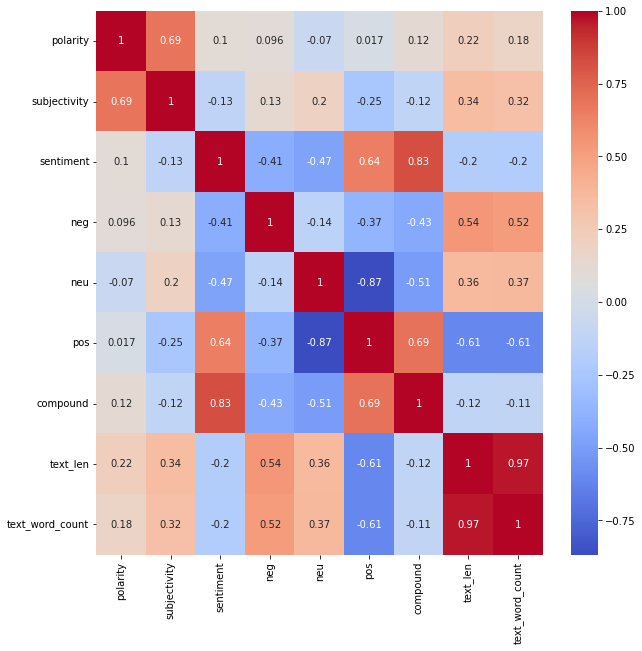

In [20]:
corr= ds.corr() 
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, ax=ax, cmap="coolwarm")

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=ds.drop(columns=['original tweets', 'text',  'sentiment', 'punct',
       'tokenized', 'nonstop', 'stemmed'])

Y= ds["sentiment"]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.25, random_state = 0)

Naive Bayes

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn . model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

In [25]:
nb=GaussianNB()
nb=nb.fit(X_train, Y_train)

In [26]:
pred=nb.predict(X_test)

In [27]:
print(nb.score(X_test, Y_test))

0.9575


In [28]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(Y_test, pred)
print("Confusion matrix:\n", cm)

cr=classification_report(Y_test, pred)
print("\nClassification report:\n", cr)

Confusion matrix:
 [[ 94   0   0]
 [  0  58   0]
 [ 34   0 614]]

Classification report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        94
           1       1.00      1.00      1.00        58
           2       1.00      0.95      0.97       648

    accuracy                           0.96       800
   macro avg       0.91      0.98      0.94       800
weighted avg       0.97      0.96      0.96       800

